# Trames I2C

## Trame I2C SCL SDA élève version1
Il ne fonctionne que pour le DS1307 et une seule lecture 

La trame se comporte de 4 adresses et start/restart/stop :

- 1 Start
- 2 Adresse du DS1307 en écriture 0xD0 = 0x68<<1 | 0    (adresse1)
- 3 Adresse du registre entre 0 et 6 pour la date ou l'heure    (adresse2)
- 4 Restart
- 5 Adresse du DS1307 en lecture 0xD1 = 0x68<<1 | 1             (adresse3)
- 6 Contenu du registre pointé par l'adresse en 3               (adresse4)
- 7 Stop

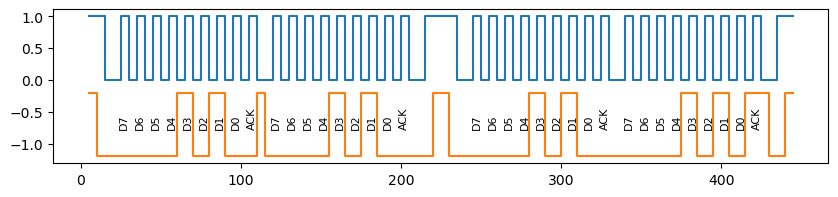

In [13]:
import pylab

def binaire(val):
    return format(10,'08b')

def octet(nb,decalage):
    for j in range(8) :
        pylab.text(4+decalage+10*j, -0.75, f'D{7-j}', fontsize=8,rotation=90)
    pylab.text(14+decalage+10*j, -0.75, 'ACK', fontsize=8,rotation=90)
    return [int(a) for a in "".join([i*4 for i in binaire(nb)])]

adresse=0x68	#DS1307
adrE=adresse<<1
adrL=adrE+1
trame=[adrE,2,adrL,20] #trame modifiable

l0=[0,0]
l1=[1,1]
l2=l1+l0 #[1,1,0,0]
l3=l0+l1 #[0,0,1,1]
ack0=2*l0 #[0,0,0,0]
ack1=2*l1 #[1,1,1,1]
l4=ack1+ack0 #[1,1,1,1,0,0,0,0]
l9=9*l2 #[1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0]
ly=l4+l9+l0+l9+l3+l1
ly*=2
lx=[5*(x//2) for x in range(3,179)]
lz=l4[2:]
lz+=octet(trame[0],20)
ack0=2*l0
lz+=ack0+l1
lz+=octet(trame[1],115)
lz+=ack0
lz+=3*l0+l4
lz+=octet(trame[2],240)
lz+=ack0+l0
lz+=octet(trame[3],335)
lz+=ack1+l2+l3
lZ=[z-1.2 for z in lz]
z = pylab.array(lZ)
x = pylab.array(lx)
y = pylab.array(ly)
pylab.plot(x,y)
pylab.plot(x,z)
pylab.gcf().set_size_inches(10, 2)
pylab.show()

## Trame I2C SCL SDA prof

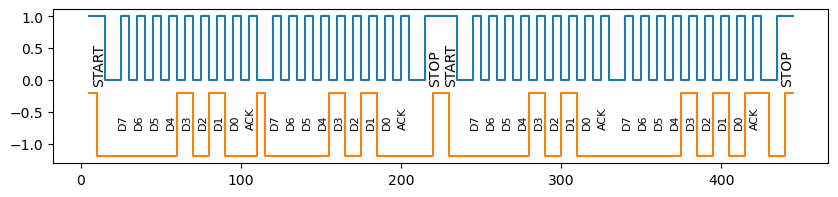

In [19]:
import pylab

def binaire(val):
    return format(10,'08b')
def octet(nb,decalage):
    for j in range(8) :
        pylab.text(3+decalage+10*j, -0.75, f'D{7-j}', fontsize=8,rotation=90)
    pylab.text(13+decalage+10*j, -0.75, 'ACK', fontsize=8,rotation=90)
    return [int(a) for a in "".join([i*4 for i in binaire(nb)])]

adresse=0x68	#DS1307
adrE=adresse<<1
adrL=adrE+1
trame=[adrE,2,adrL,20] #trame modifiable

l0=[0,0]
l1=[1,1]
l2=l1+l0
l3=l0+l1
ack0=2*l0
ack1=2*l1
l4=ack1+ack0
l9=9*l2
ly=l4+l9+l0+l9+l3+l1
ly*=2
lx=[5*(x//2) for x in range(3,179)]
pylab.text(7, -0.05, 'START', fontsize=10,rotation=90)
pylab.text(217, -0.05, 'STOP', fontsize=10,rotation=90)
pylab.text(227, -0.05, 'START', fontsize=10,rotation=90)
pylab.text(437, -0.05, 'STOP', fontsize=10,rotation=90)
lz=l4[2:]
lz+=octet(trame[0],20)
ack0=2*l0
lz+=ack0+l1
lz+=octet(trame[1],115)
lz+=ack0
lz+=3*l0+l4
lz+=octet(trame[2],240)
lz+=ack0+l0
lz+=octet(trame[3],335)
lz+=ack1+l2+l3
lZ=[z-1.2 for z in lz]
z = pylab.array(lZ)
x = pylab.array(lx)
y = pylab.array(ly)
pylab.plot(x,y)
pylab.plot(x,z)
pylab.gcf().set_size_inches(10, 2)
pylab.show()

## Trame I2C RTC  SCL SDA élève version 2

Ici on peut mettre autant de registre en lecture que l'on veut 

Exemple s59:44:17 # pour 17h44m59s

Menu, vous devrez choisir une lettre puis des nombres séparés par :
Taper h pour heure, m pour minute, s pour seconde,
J pour jour, M pour mois, A pour année, D pour le jour de la semaine
Après la lettre, accolez un premier nombre, qui devra être valide ! puis : et un autre nombre valide ...
exemple h15:16(entrée)
tapez la touche Entrée pour valider
Lettre nombre:nombre... Entrée >>> s49:5:15
trame  [208, 0, 209, 73, 5, 21]


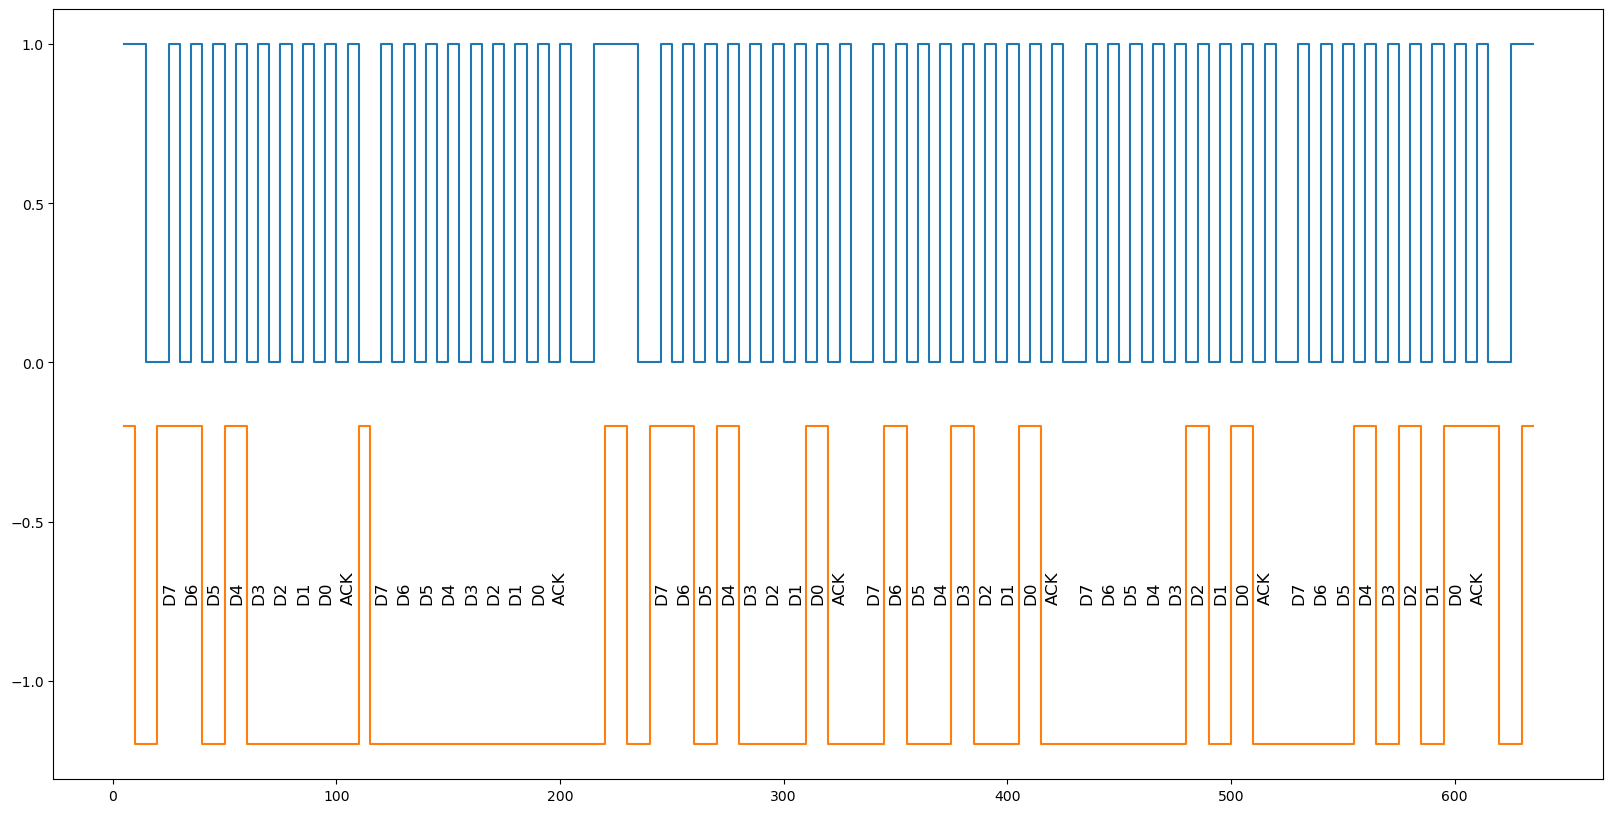

In [3]:
import pylab,sys

def binaire(val):
    return format(val,'08b')

def octet(nb,decalage):
    for j in range(8) :
        pylab.text(2+decalage+10*j, -0.75, f'D{7-j}', fontsize=12,rotation=90)
    pylab.text(12+decalage+10*j, -0.75, 'ACK', fontsize=12,rotation=90)
    return [int(a) for a in "".join([i*4 for i in binaire(nb)])]

adresse=0x68	#DS1307
adrE=adresse<<1
adrL=adrE|1
l0=[0,0]
l1=[1,1]
l2=l1+l0
l3=l0+l1
l4=9*l2+l0
print("Menu, vous devrez choisir une lettre puis des nombres séparés par :")
print("Taper h pour heure, m pour minute, s pour seconde,")
print("J pour jour, M pour mois, A pour année, D pour le jour de la semaine")
print("Après la lettre, accolez un premier nombre, qui devra être valide ! puis : et un autre nombre valide ...")
print("exemple h15:16(entrée)")
print("tapez la touche Entrée pour valider")
mot=input("Lettre nombre:nombre... Entrée >>> ")
horodateur=['s','m','h','D','J','M','A'] #pour DS1307
horo2=[0x60,0x60,0x24,7,0x32,0x12,0x9A]#valeur max
try :
    reg=horodateur.index(mot[0])
except ValueError:
    print(" Il faut taper une lettre valide !")
    exit
valeurs=mot[1:].split(':')
nb=len(valeurs)
trame=[adrE,reg,adrL]
for i in range(nb) :
    valeur=eval('0x'+valeurs[i])
    if not(valeur<horo2[reg+i] and valeurs[i].isnumeric()) :
        print("le nombre doit être valide")
        sys.exit(0)
    trame.append(valeur)
print("trame ",trame)
ly1=2*l1+2*l0+l4+l4+2*l1
ly2=2*l1+2*l0+l4*(1+nb)+2*l1
ly=ly1+ly2
lx=[5*(x//2) for x in range(3,141+38*nb)]
lz=l1+2*l0  
lz+=octet(trame[0],20)
lz+=2*l0+l1    
lz+=octet(trame[1],115)
lz+=2*l0        
lz+=3*l0+2*l1+2*l0
for i in range(nb) :
    lz+=octet(trame[2+i],240+95*i)
    lz+=3*l0             
lz+=octet(trame[2+nb],240+95*nb)
lz+=3*l1+2*l0+l1
lZ=[z-1.2 for z in lz]
z = pylab.array(lZ)
x = pylab.array(lx)
y = pylab.array(ly)
pylab.plot(x,y)
pylab.plot(x,z)
#pylab.savefig("trame_I2C_"+mot+".svg", format="svg")
pylab.gcf().set_size_inches(20, 10)
pylab.show()